In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
from scipy import stats
import seaborn as sns
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
data = pd.read_csv("C:\\Users\\user\\Desktop\\Fourh Year\\CISC 251\\ispcustomerchurn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.head(21)

,index,0
0,customerID,0
1,gender,0
2,SeniorCitizen,0
3,Partner,0
4,Dependents,0
5,tenure,0
6,PhoneService,0
7,MultipleLines,0
8,InternetService,0
9,OnlineSecurity,0


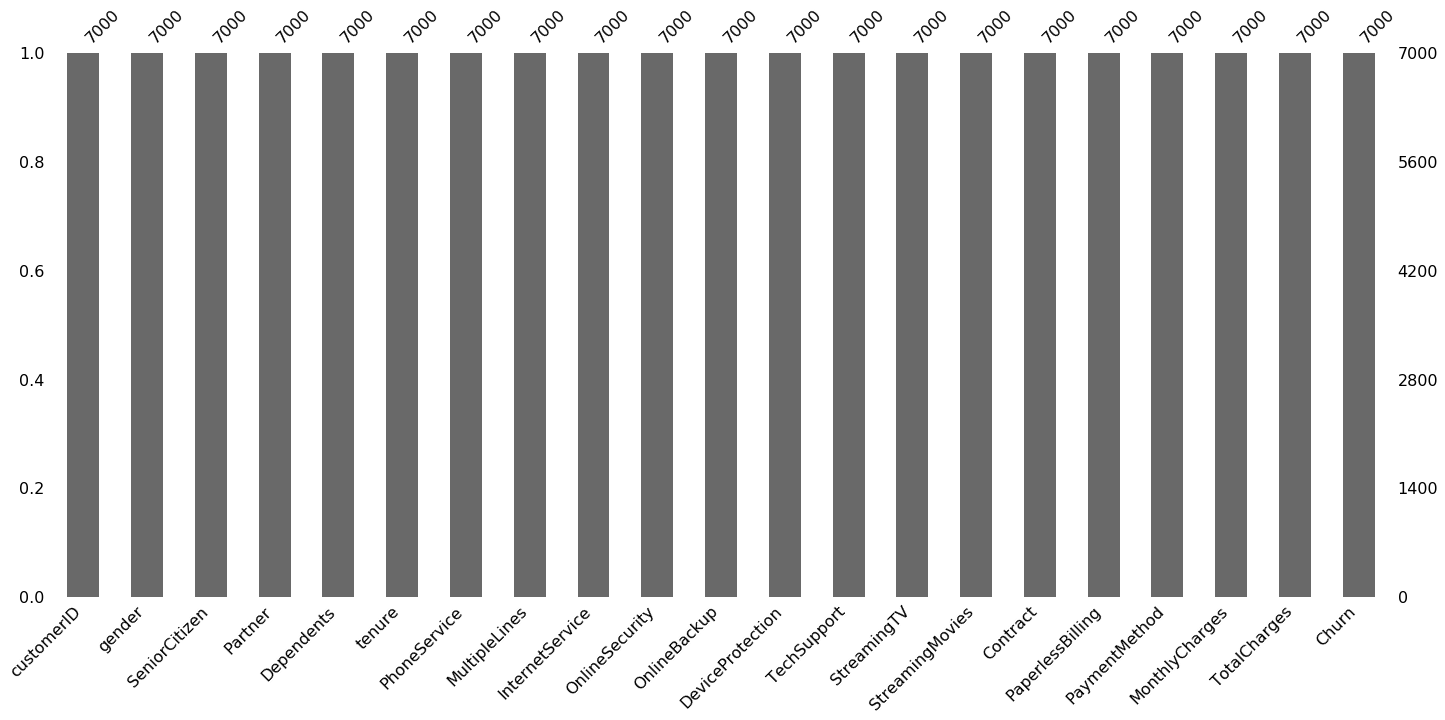

In [34]:
msno.bar(data.sample(7000))

In [35]:
numeric_attributes = data[["TotalCharges","MonthlyCharges"]]
correlation=numeric_attributes.corr()
print(correlation)
#f,ax = plt.subplots(figsize = (14,12))
#plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16)
#sns.heatmap(correlation,square=True,vmax=1)


                MonthlyCharges
MonthlyCharges             1.0


In [36]:
#data_cut["TotalCharges"] = data["TotalCharges"].replace(0, np.NaN)
#data_cut.dropna(inplace=True)

#data["TotalCharges"] == data_cut["TotalCharges"]
#print(data["TotalCharges"])
#sns.set()
#columns = ["tenure","MonthlyCharges",'TotalCharges']
#sns.pairplot(data_cut[columns], size=2,kind='scatter',diag_kind='kde')
#plt.show()

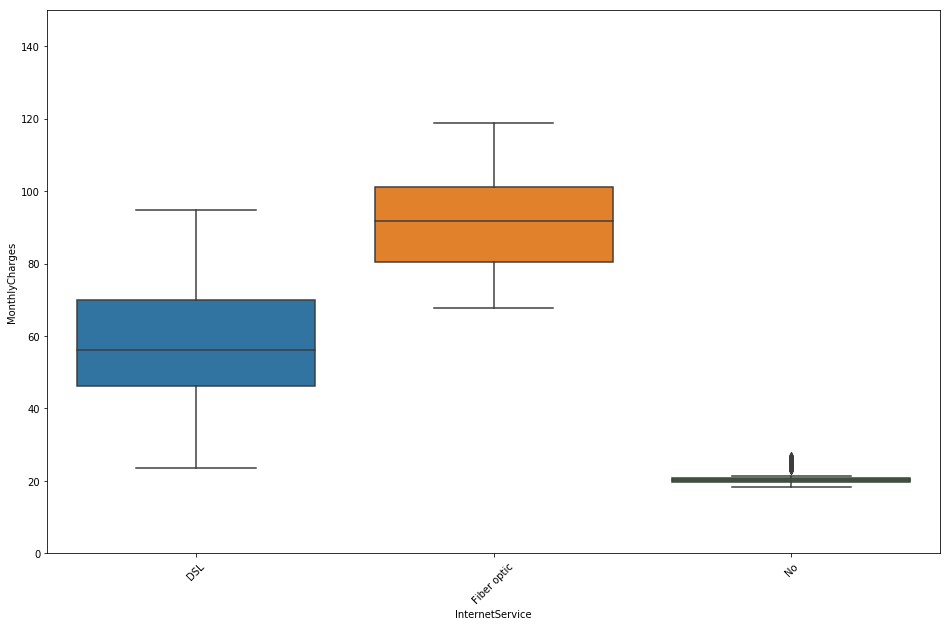

In [37]:
var = 'InternetService'
boxdata = pd.concat([data['MonthlyCharges'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="MonthlyCharges", data=boxdata)
fig.axis(ymin=0, ymax=150);
xt = plt.xticks(rotation=45)


In [38]:
data[["tenure","MonthlyCharges","TotalCharges"]].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Text(0,0.5,'Monthly Charges ($)')

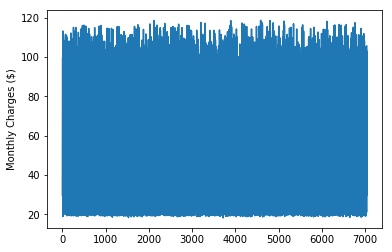

In [39]:
data["MonthlyCharges"].plot()
plt.ylabel('Monthly Charges ($)')

Text(0,0.5,'Tenure (months)')

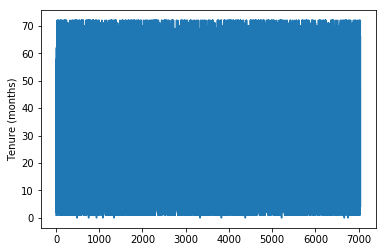

In [40]:
data["tenure"].plot()
plt.ylabel('Tenure (months)')

In [41]:
##data_chi = data.apply(lambda x :pd.factorize(x)[0])+1
##pd.Dataframe([chisquare(data_chi[x].values,f_exp=data_chi.values.T,axis=1)[0] for x in data_chi])

In [42]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


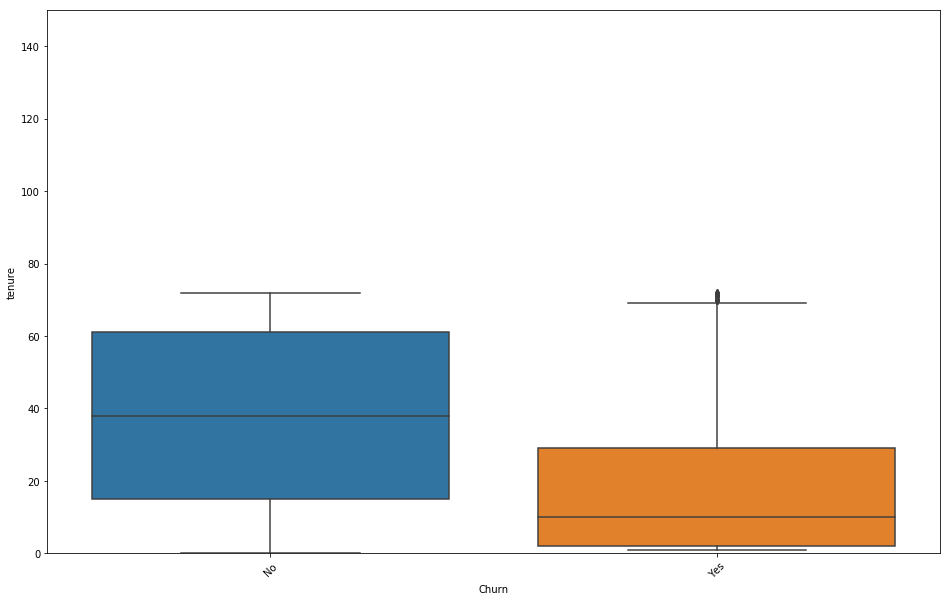

In [43]:
var = 'Churn'
boxdata = pd.concat([data['tenure'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="tenure", data=boxdata)
fig.axis(ymin=0, ymax=150);
xt = plt.xticks(rotation=45)

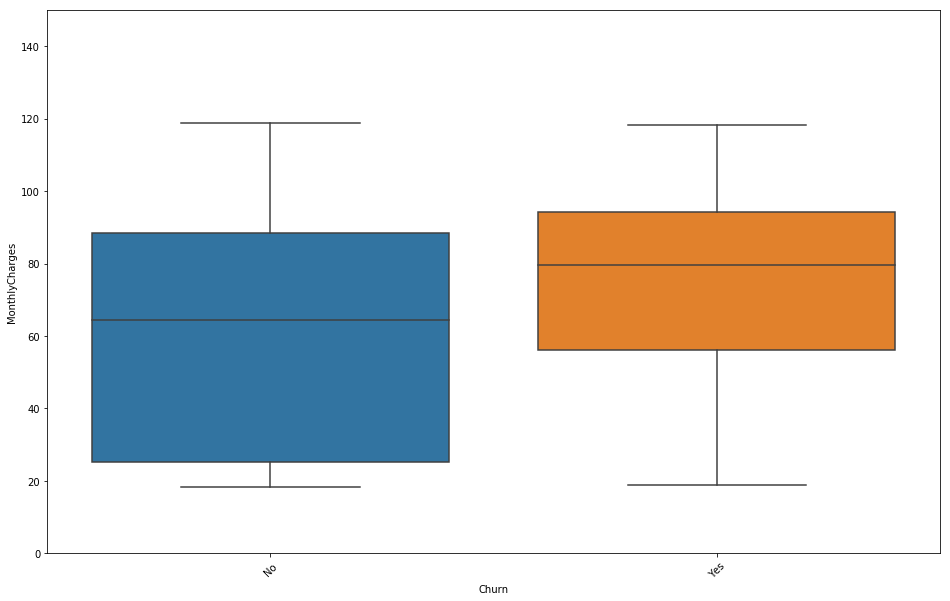

In [45]:
var = 'Churn'
boxdata = pd.concat([data['MonthlyCharges'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="MonthlyCharges", data=boxdata)
fig.axis(ymin=0, ymax=150);
xt = plt.xticks(rotation=45)

In [46]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


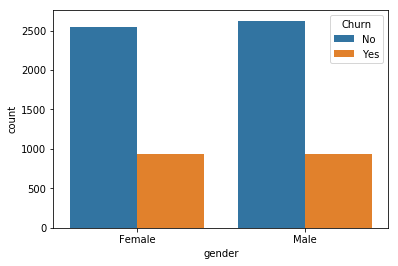

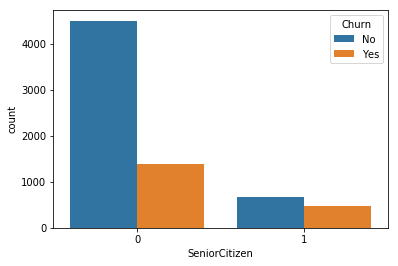

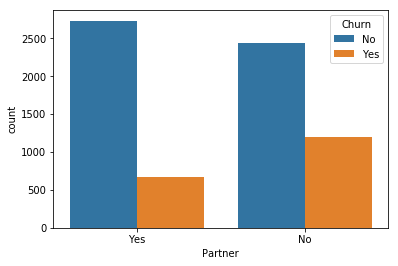

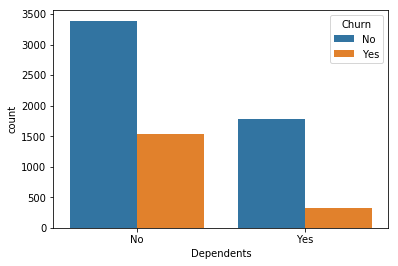

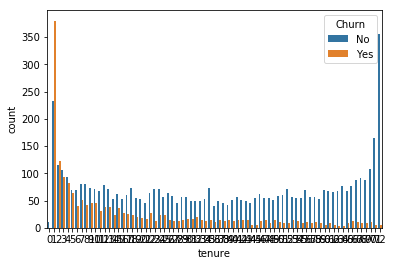

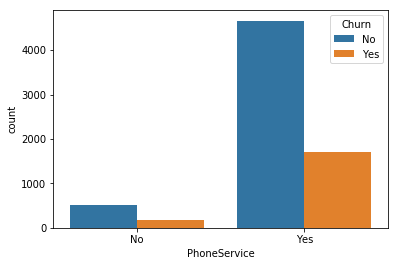

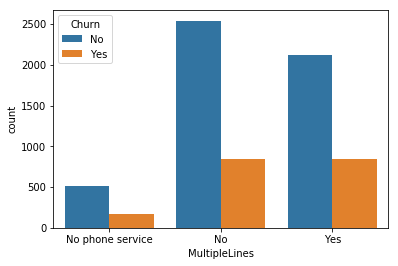

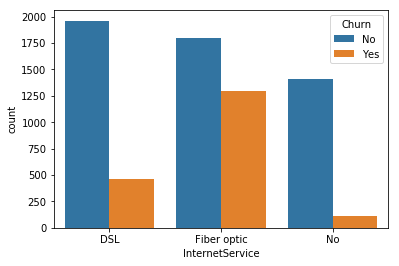

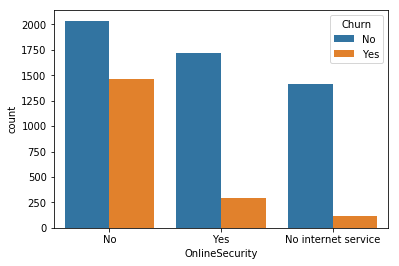

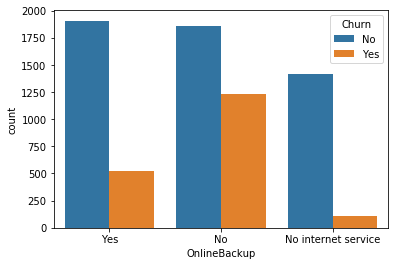

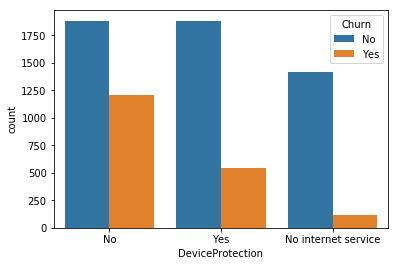

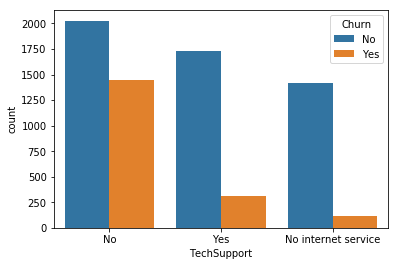

In [48]:
for i, predictor in enumerate(data.drop(columns=['Churn', 'customerID', 'PaymentMethod', 'PaperlessBilling', 'Contract', 'StreamingMovies', 'StreamingTV', 'TotalCharges', 'MonthlyCharges'])):#['gender', 'PhoneService', 'MultipleLines', 'InternetService','SeniorCitizen', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

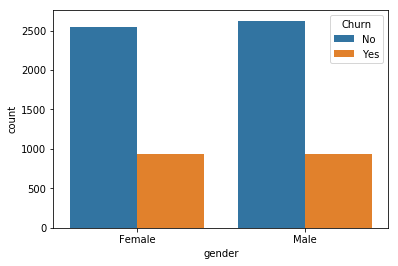

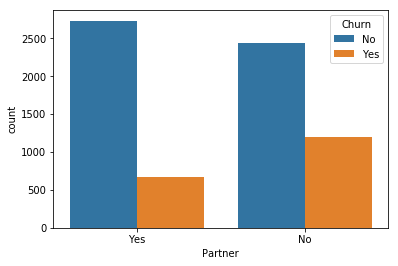

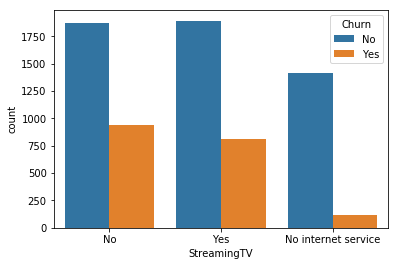

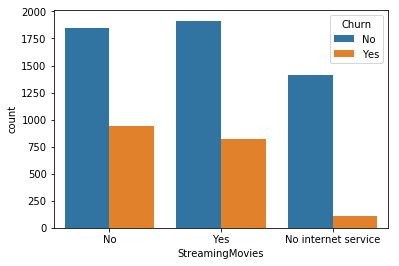

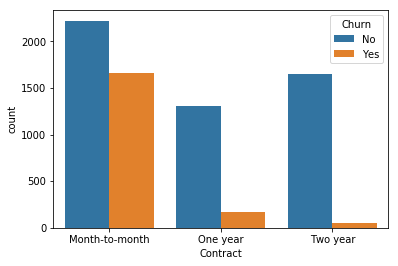

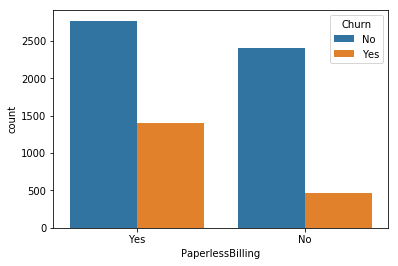

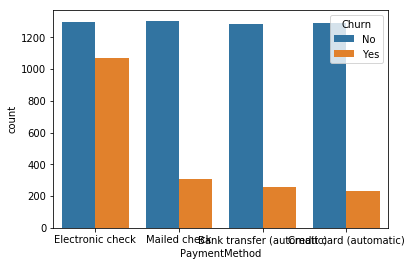

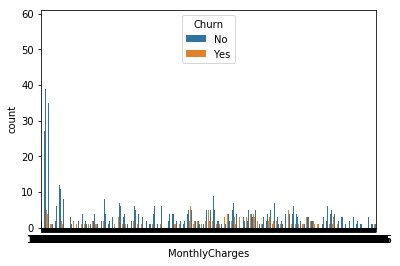

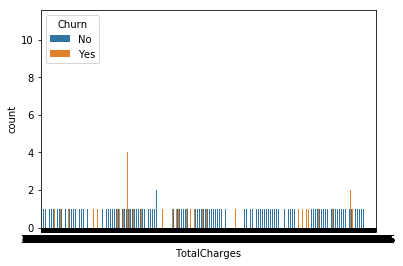

In [50]:
for i, predictor in enumerate(data.drop(columns=['Churn', 'customerID', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'])):#['gender', 'PhoneService', 'MultipleLines', 'InternetService','SeniorCitizen', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

(0, 40)

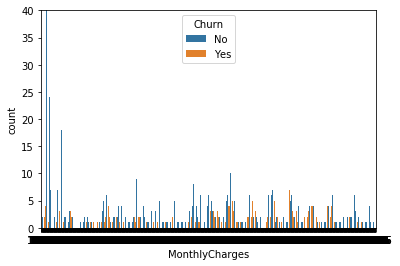

In [54]:
sns.countplot(data=data, x="MonthlyCharges", hue='Churn')
plt.ylim(0,40)


In [1]:
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt